# Save FORTRAN output to .obj

In [2]:
import trimesh 
import numpy as np

mesh = trimesh.load_mesh('/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/shell_mod_coarse_faces_2024.stl')
thickness_ro = np.zeros(len(mesh.faces))
# read LTX_SO.txt and LTX_RO_true.txt to get deposition on faces
with open('LTX_R0.txt') as f:
    lines = f.readlines()
    # read second column of the file
    for i,line in enumerate(lines):
        thickness_ro[i] = float(line.split()[1])
thickness_so = np.zeros(len(mesh.faces))
with open('LTX_SO.txt') as f:
    lines = f.readlines()
    # read second column of the file
    for i,line in enumerate(lines):
        thickness_so[i] = float(line.split()[1])
        
thickness = thickness_ro + thickness_so
faces_to_color = np.arange(len(mesh.faces)).tolist()
color = trimesh.visual.interpolate(thickness, color_map='coolwarm')
# set to white if thickness is zero
color[thickness==0.0] = [0,0,0,0]
mesh.visual.face_colors[faces_to_color] = color[faces_to_color]

source_mesh = trimesh.load_mesh('/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/source.stl')
source_mesh.visual.face_colors = [255,0,0,255]

source_obs = '/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/obs_source.stl'
source_obs_mesh = trimesh.load_mesh(source_obs)
source_obs_mesh.visual.face_colors = [0,0,255,255]


# add the two meshes together into a single obj and export
combined_mesh = mesh + source_mesh + source_obs_mesh 

combined_mesh.export('deposition_new.obj')




'# https://github.com/mikedh/trimesh\nv -467.25463867 -76.19999695 467.25463867 0.36470588 0.48627451 0.89803922\nv -462.72857666 -94.51423645 462.72857666 0.35686275 0.47058824 0.89019608\nv -485.16003418 -76.19999695 440.45736694 0.38823529 0.50980392 0.90980392\nv -477.36822510 -102.42351532 435.25708008 0.38039216 0.50588235 0.90980392\nv -495.27590942 -102.42351532 408.45632935 0.42745098 0.56078431 0.94509804\nv -485.83880615 -127.86334229 402.15170288 0.39215686 0.51764706 0.92156863\nv -503.73922729 -127.86334229 375.36178589 0.37647059 0.49411765 0.89803922\nv -492.79989624 -152.39485168 368.05871582 0.36470588 0.48235294 0.89411765\nv -510.71408081 -152.39485168 341.24822998 0.35686275 0.47058824 0.88627451\nv -498.54125977 -176.08345032 333.11462402 0.37254902 0.49019608 0.89803922\nv -528.62866211 -152.39485168 314.43719482 0.39215686 0.50980392 0.90980392\nv -516.45886230 -176.08345032 306.29898071 0.41568627 0.54509804 0.92941176\nv -546.52484131 -152.39485168 287.6536865

# Import blender image and slap a colorbar on it

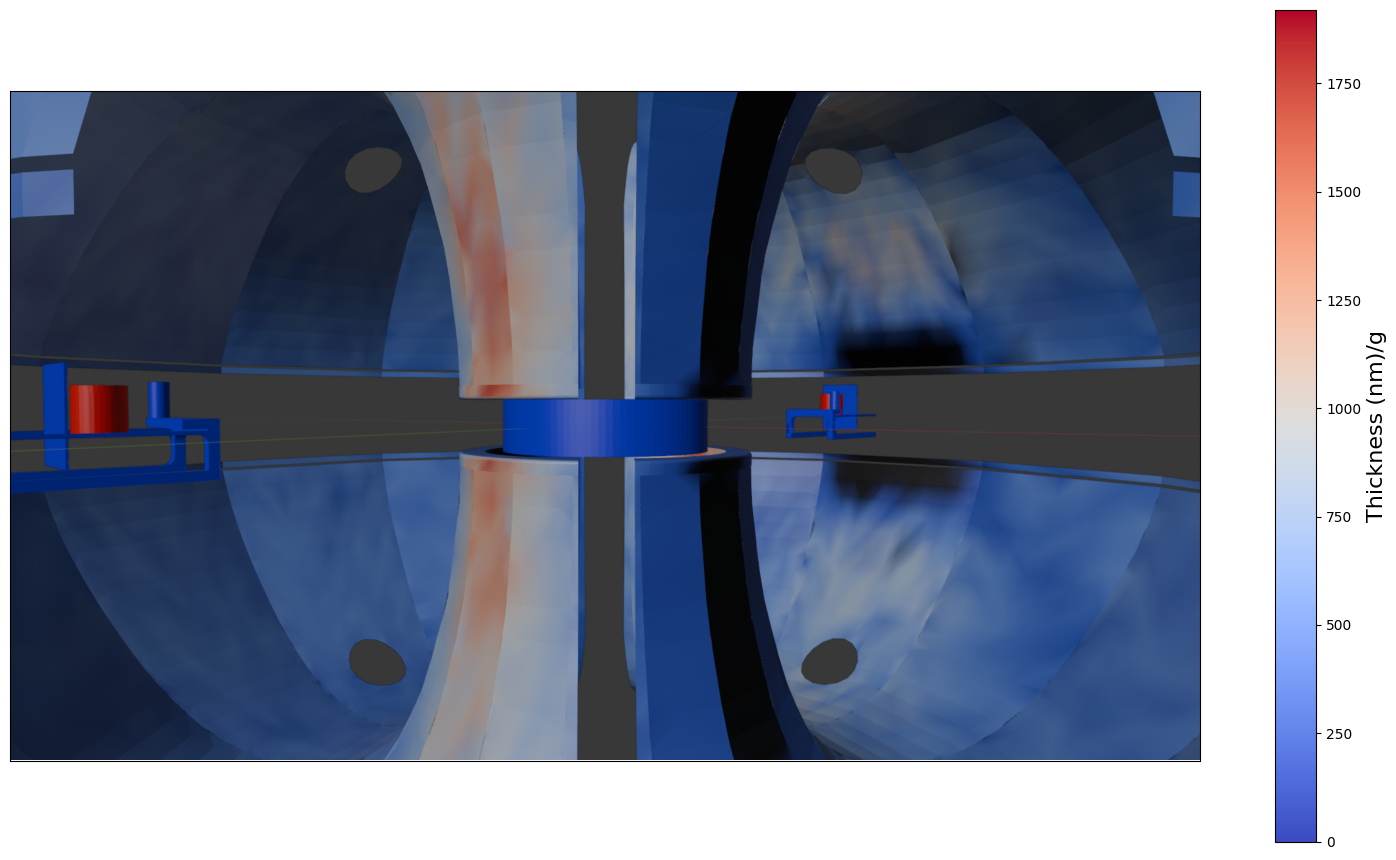

In [6]:
# create a colorbar using coolwarm with 1000 steps between min and max thickness, label the colorbar with 'Thickness (nm)/g'

import matplotlib.pyplot as plt
import matplotlib.cm as cm

img = plt.imread('clean_out.png')
# get image size
height, width, _ = img.shape
# create fig and ax with the same size as the image
fig, ax = plt.subplots(figsize=(width/100, height/100))
cmap = plt.cm.coolwarm
norm = plt.Normalize(thickness.min(), thickness.max())
cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb1.set_label('Thickness (nm)/g', fontsize=16)
ax.imshow(img)
# hide axis tick labels 
ax.set_xticks([])
ax.set_yticks([])
# save the figure
plt.savefig('with_colorbar.png', dpi=100)


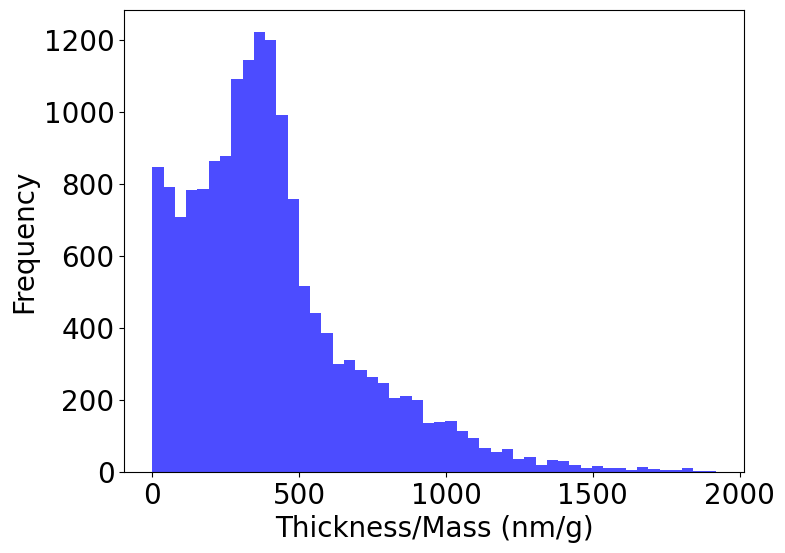

In [16]:
# creat and store histogram of thickness

fig, ax = plt.subplots(figsize=(8,6))
# remove 0 thickness values
thickness = thickness[thickness>0]
ax.hist(thickness, bins=50, color='blue', alpha=0.7)
# set x and y labels
ax.set_xlabel('Thickness/Mass (nm/g)', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
# increase font size of ticks
ax.tick_params(axis='both', which='major', labelsize=20)
# save the figure
plt.savefig('histogram.png', dpi=100)
